In [39]:
import networkx as nx
import numpy as np
import community as community_lv

from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.ensemble import VotingClassifier

import matplotlib.pyplot as plt

# Data Preparation

In [40]:
def read_data(data_path="../data/emails.txt", labels_path="../data/emails_labels.txt"):
    with open(labels_path, "r") as f:
        nodes_labels = f.read()

    nodes_labels = nodes_labels.strip("\n").split("\n")
    nodes = [int(x.split()[0]) for x in nodes_labels]
    labels = [int(x.split()[1]) for x in nodes_labels]

    with open(data_path, "r") as f:
        edges_data = f.read()

    edges = {x: dict() for x in nodes}
    edges = [(int(x.split()[0]), int(x.split()[1])) for x in edges_data.strip("\n").split("\n")]

    return edges, nodes, labels

In [41]:
def create_graph(edges, nodes):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

In [42]:
e, n, l = read_data()
G = create_graph(e, n)
G.number_of_edges()

16706

In [43]:
def visualize(edges, nodes, labels, communities, x):
    np.random.seed = 30
    cmap = plt.cm.get_cmap('hsv', 42)
    node_labels = np.array(labels)
    norm = plt.Normalize(vmin=node_labels.min(), vmax=node_labels.max())
    color_map = cmap(norm(node_labels))

    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    pos = {}
    n = np.ceil(x ** 0.5)
    print(n)

    for node, community in enumerate(communities):
        x = (community % n) * 10  + np.random.random() * 7
        y = (community // n) * 10 + np.random.random() * 7
        pos[node] = [x, y]

    nx.draw(G, pos=pos, with_labels=False, node_size=3, width=0.01, node_color=color_map)
    plt.show();

In [44]:
L = nx.laplacian_matrix(G).todense()

eigvals, eigvecs = np.linalg.eig(L)
indices = np.argsort(eigvals)[:2]
X = np.real(eigvecs[:, indices])

k = 36
model = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)


In [45]:
modularity_score = community_lv.modularity({i: labels[i] for i in range(1005)}, G)
print("Modularity score: ", modularity_score)

Modularity score:  0.03243678511434192


In [46]:
nmi_score_louvain = normalized_mutual_info_score(labels, l)
f"{nmi_score_louvain=}"

'nmi_score_louvain=0.15064254644045752'

6.0


C:\Users\MichaelKuzmyn\AppData\Local\Temp\ipykernel_5708\1187922494.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('hsv', 42)


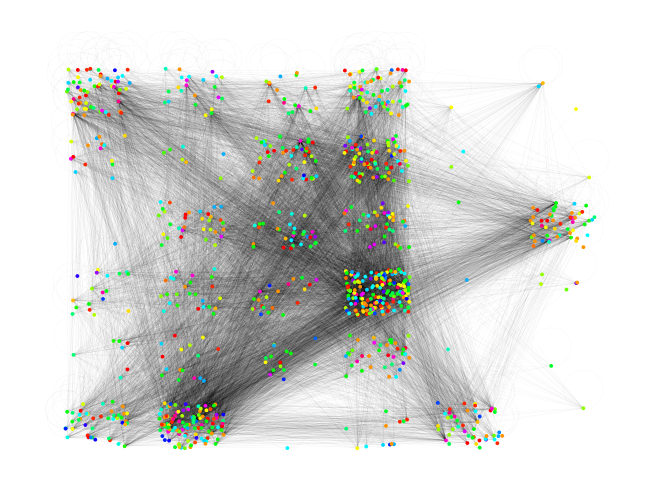

In [47]:
visualize(e, n, l, labels, k)